In [1]:
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import math
import numpy as np
import pandas as pd

import csv
import os

In [9]:
# Load data

# Expects all relevant files to be in this folder
folder = 'FDs_ManySize'
files = [f for f in os.listdir(folder) if 'Lung' in f]

df_list = []
for f in files:
    df_dict = {}
    with open(os.path.join(folder, f), 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        csv_data = list(csv_reader)
    
    sc_arr = np.asarray(csv_data[4:]).astype(int)
    sizes, counts = sc_arr[:, 0], sc_arr[:, 1]
    
    df_dict = {
        'SID':                 '_'.join(f.split('_')[:-2]),
        'Lobe':                '',
        'Fractal_Dimension':   float(csv_data[0][1]),
        'Coefficients':        np.array([csv_data[1][1], csv_data[2][1]]).astype(float),
        'Sizes':               sizes,
        'Counts':              counts,
    }
    
    if 'left' in f:
        df_dict['Lobe'] = 'left'
    elif 'right' in f:
        df_dict['Lobe'] = 'right'
    else:
        df_dict['Lobe'] = 'whole'
    
    df_list.append(df_dict)

df = pd.DataFrame(df_list)
display(df)

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts
0,001_pect_phfirst_060413,left,2.347324,"[-2.3473239160122565, 13.965021814561254]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[15, 16, 16, 16, 16, 16, 17, 18, 19, 19, 19, 1..."
1,001_pect_phfirst_060413,right,2.429785,"[-2.4297845540278282, 14.520909088851516]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[16, 17, 18, 18, 19, 19, 22, 22, 22, 23, 24, 2..."
2,001_pect_phfirst_060413,whole,2.369139,"[-2.3691394183780154, 14.89276184688695]","[256, 254, 252, 250, 248, 246, 244, 242, 240, ...","[6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, ..."
3,002_pect_phfirst_050913,left,2.328834,"[-2.328833828390693, 13.73905675683692]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[12, 12, 12, 14, 15, 15, 17, 17, 17, 17, 18, 1..."
4,002_pect_phfirst_050913,right,2.359908,"[-2.3599076356778164, 14.091450974696084]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[16, 16, 17, 18, 18, 18, 18, 18, 18, 18, 18, 1..."
...,...,...,...,...,...,...
671,387_pect_phfirst_090117,right,2.366928,"[-2.366928009750587, 13.894833306181253]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[12, 12, 12, 12, 12, 12, 14, 14, 14, 15, 16, 1..."
672,387_pect_phfirst_090117,whole,2.380943,"[-2.380942581510983, 14.61408053152708]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[20, 20, 21, 22, 23, 24, 27, 28, 29, 31, 32, 3..."
673,388_pect_phfirst_080516,left,2.293659,"[-2.293659056750019, 12.584723522985469]","[64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 4...","[19, 21, 24, 28, 30, 31, 33, 39, 42, 43, 52, 5..."
674,388_pect_phfirst_080516,right,2.282229,"[-2.2822292102205513, 12.78999340700799]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, ..."


In [10]:
# Generate Stats!

r_squared_list = []
residuals_list = []
pairwise_slopes_list = []
for index, row in df.iterrows():
    sizes_log = np.log(row['Sizes'])
    counts_log = np.log(row['Counts'])
    coeffs = row['Coefficients']
    
    # Calculate R Squared
    correlation_matrix = np.corrcoef(sizes_log, counts_log)
    r_squared = correlation_matrix[0, 1]**2
    r_squared_list.append(r_squared)
    
    # Calculate Residuals
    residuals = counts_log - np.polyval(coeffs, sizes_log)
    residuals_list.append(residuals)
    
    # Calculate Pairwise Slopes
    pairwise_slopes = (counts_log[1:] - counts_log[:-1]) / (sizes_log[1:] - sizes_log[:-1])
    pairwise_slopes_list.append(pairwise_slopes)

df['R_Squared'] = r_squared_list
df['Residuals'] = residuals_list
df['Pairwise_Slopes'] = pairwise_slopes_list

df

,SID,Lobe,Fractal_Dimension,Coefficients,Sizes,Counts,R_Squared,Residuals,Pairwise_Slopes
0,001_pect_phfirst_060413,left,2.347324,"[-2.3473239160122565, 13.965021814561254]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[15, 16, 16, 16, 16, 16, 17, 18, 19, 19, 19, 1...",0.999069,"[0.132315066254733, 0.15988709244309396, 0.122...","[-4.098111394613504, -0.0, -0.0, -0.0, -0.0, -..."
1,001_pect_phfirst_060413,right,2.429785,"[-2.4297845540278282, 14.520909088851516]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[16, 17, 18, 18, 19, 19, 22, 22, 22, 23, 24, 2...",0.999284,"[0.04106782433571743, 0.06342733163965253, 0.0...","[-3.849583924157099, -3.5723246524776546, -0.0..."
2,001_pect_phfirst_060413,whole,2.369139,"[-2.3691394183780154, 14.89276184688695]","[256, 254, 252, 250, 248, 246, 244, 242, 240, ...","[6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, ...",0.998811,"[0.0362960879583043, 0.017714507070055507, -0....","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -18..."
3,002_pect_phfirst_050913,left,2.328834,"[-2.328833828390693, 13.73905675683692]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[12, 12, 12, 14, 15, 15, 17, 17, 17, 17, 18, 1...",0.998867,"[0.04542210794250545, 0.008746801493531908, -0...","[-0.0, -0.0, -9.480057929434617, -4.1739736917..."
4,002_pect_phfirst_050913,right,2.359908,"[-2.3599076356778164, 14.091450974696084]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[16, 16, 17, 18, 18, 18, 18, 18, 18, 18, 18, 1...",0.998210,"[0.13148101590745176, 0.09431634804896083, 0.1...","[-0.0, -3.788958029318561, -3.515164999366361,..."
...,...,...,...,...,...,...,...,...,...
671,387_pect_phfirst_090117,right,2.366928,"[-2.366928009750587, 13.894833306181253]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[12, 12, 12, 12, 12, 12, 14, 14, 14, 15, 16, 1...",0.999124,"[0.07447967943562306, 0.03720445222018265, -0....","[-0.0, -0.0, -0.0, -0.0, -0.0, -9.017595177753..."
672,387_pect_phfirst_090117,whole,2.380943,"[-2.380942581510983, 14.61408053152708]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[20, 20, 21, 22, 23, 24, 27, 28, 29, 31, 32, 3...",0.999275,"[-0.06594279582690055, -0.10343872952117783, -...","[-0.0, -3.049320205927043, -2.8609179251832737..."
673,388_pect_phfirst_080516,left,2.293659,"[-2.293659056750019, 12.584723522985469]","[64, 62, 60, 58, 56, 54, 52, 50, 48, 46, 44, 4...","[19, 21, 24, 28, 30, 31, 33, 39, 42, 43, 52, 5...",0.999442,"[-0.10122469370667453, -0.07396192457895223, -...","[-3.1523641556990016, -4.072342609027289, -4.5..."
674,388_pect_phfirst_080516,right,2.282229,"[-2.2822292102205513, 12.78999340700799]","[128, 126, 124, 122, 120, 118, 116, 114, 112, ...","[7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, ...",0.996888,"[0.22936193923880288, 0.19342057895313558, 0.2...","[-0.0, -8.345533994137261, -0.0, -0.0, -0.0, -..."


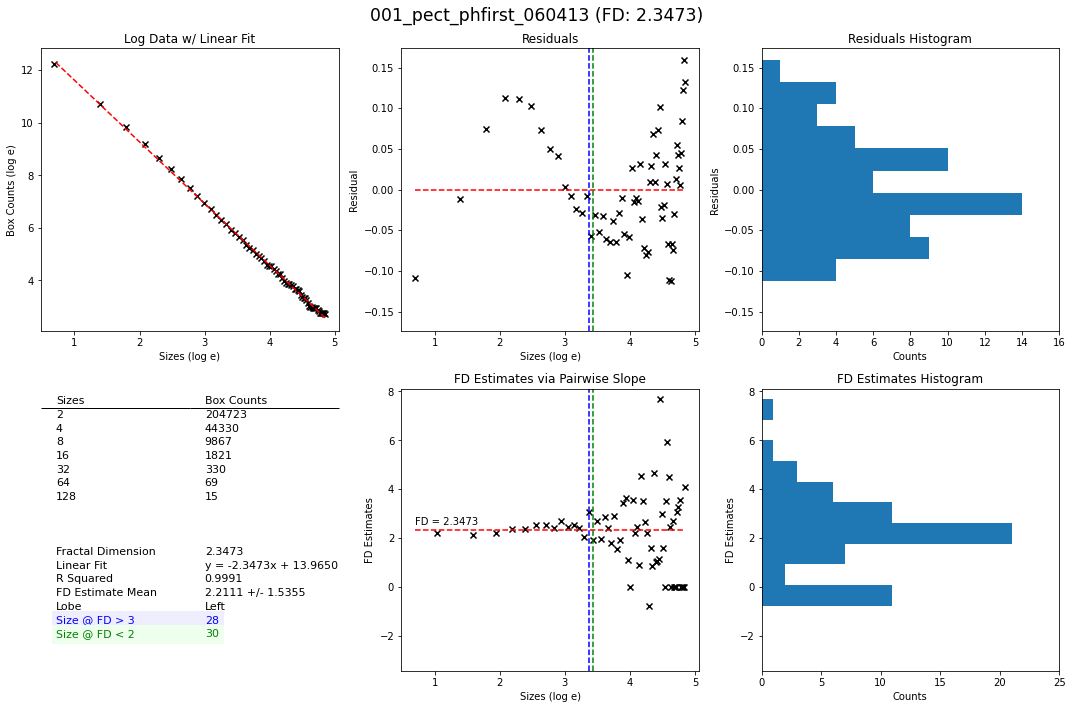

In [169]:
# Generate Figure!

for num in range(0, len(df)):
    # Grab all of the needed values from the dataframe
    sizes_log = np.log(df['Sizes'][num])
    sizes_log_half = (sizes_log[1:] + sizes_log[:-1]) / 2
    counts_log = np.log(df['Counts'][num])
    coeffs = df['Coefficients'][num]
    r_squared = df['R_Squared'][num]
    residuals = df['Residuals'][num]
    pairwise_slopes = df['Pairwise_Slopes'][num]
    fd = df['Fractal_Dimension'][num]
    sid = df['SID'][num]
    lobe = df['Lobe'][num]
    
    # FD > 3 and FD < 2
    fd_upper = sizes_log_half[::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] > 3)]
    fd_lower = sizes_log_half[::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] < 2)]

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    plt.suptitle(f'{sid} (FD: {fd:.4f})', fontsize='xx-large')

    # Log Size vs Log Count w/ Linear Fit
    axes[0, 0].plot(sizes_log, np.polyval(coeffs, sizes_log), 'r--')
    axes[0, 0].scatter(sizes_log, counts_log, c='k', marker='x')
    axes[0, 0].set_title('Log Data w/ Linear Fit')
    axes[0, 0].set_xlabel('Sizes (log e)')
    axes[0, 0].set_ylabel('Box Counts (log e)')

    # Residuals w/ Mean Line
    axes[0, 1].hlines(0, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[0, 1].scatter(sizes_log, residuals, c='k', marker='x')
    axes[0, 1].set_title('Residuals')
    axes[0, 1].set_xlabel('Sizes (log e)')
    axes[0, 1].set_ylabel('Residual')
    yabs_max = abs(max(axes[0, 1].get_ylim(), key=abs))
    axes[0, 1].set_ylim(-yabs_max, yabs_max)
    
    axes[0, 1].vlines(fd_upper, -yabs_max, yabs_max, colors='b', linestyles='dashed') # FD > 3
    axes[0, 1].vlines(fd_lower, -yabs_max, yabs_max, colors='g', linestyles='dashed') # FD < 2

    # Residuals Hist
    axes[0, 2].hist(residuals, orientation='horizontal')
    axes[0, 2].set_title('Residuals Histogram')
    axes[0, 2].set_xlabel('Counts')
    axes[0, 2].set_ylabel('Residuals')
    axes[0, 2].set_ylim(-yabs_max, yabs_max)
    axes[0, 2].set_xticks([i for i in axes[0, 2].get_xticks() if not i % 1])

    # Pairwise_Slope w/ FD Line
    axes[1, 1].hlines(fd, min(sizes_log), max(sizes_log), colors='r', linestyles='dashed')
    axes[1, 1].scatter(sizes_log_half, -pairwise_slopes, c='k', marker='x')
    axes[1, 1].set_title('FD Estimates via Pairwise Slope')
    axes[1, 1].set_xlabel('Sizes (log e)')
    axes[1, 1].set_ylabel('FD Estimates')
#     axes[1, 1].text(max(sizes_log)-4.1, fd+0.02, f'FD = {fd:.5}')
    axes[1, 1].text(0.7, fd+0.2, f'FD = {fd:.5}')
    yabs_max = abs(max(axes[1, 1].get_ylim()-fd, key=abs))
    axes[1, 1].set_ylim(fd-yabs_max, fd+yabs_max)
    
    axes[1, 1].vlines(fd_upper, fd-yabs_max, fd+yabs_max, colors='b', linestyles='dashed') # FD > 3
    axes[1, 1].vlines(fd_lower, fd-yabs_max, fd+yabs_max, colors='g', linestyles='dashed') # FD < 2

    # Pairwise_Slope Hist
    axes[1, 2].hist(-pairwise_slopes, orientation='horizontal')
    axes[1, 2].set_title('FD Estimates Histogram')
    axes[1, 2].set_xlabel('Counts')
    axes[1, 2].set_ylabel('FD Estimates')
    axes[1, 2].set_ylim(fd-yabs_max, fd+yabs_max)
    axes[1, 2].set_xticks([i for i in axes[1, 2].get_xticks() if not i % 1])

    # Data Table
    fd_estimate_mean = np.mean(-pairwise_slopes)
    fd_estimate_std = np.std(-pairwise_slopes)

    ind = list(2**np.arange(np.log2(df['Sizes'][num][0]), dtype=int)-1)
    sizes = df['Sizes'][num][::-1][ind]
    boxes = df['Counts'][num][::-1][ind]
    
    # Add to Table
    cells = [['Sizes', 'Box Counts']]
    for size, count in zip(sizes, boxes):
        cells.append([str(size), str(count)])
    for i in range(0, 10-len(sizes)):
        cells.append(['', ''])

    cells.append(['Fractal Dimension', f'{fd:.4f}'])
    cells.append(['Linear Fit', f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}'])
    cells.append(['R Squared', f'{r_squared:.4f}'])
    cells.append(['FD Estimate Mean', f'{fd_estimate_mean:.4f} +/- {fd_estimate_std:.4f}'])
    cells.append(['Lobe', f'{lobe.capitalize()}'])
    
    # FD > 3 and FD < 2
    fd_upper_s = df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] > 3)]
    fd_lower_s = df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] < 2)]
    cells.append(['Size @ FD > 3                    ', f'{fd_upper_s}'])
    cells.append(['Size @ FD < 2                  ', f'{fd_lower_s}'])

    axes[1, 0].axis('tight')
    axes[1, 0].axis('off')
    table = axes[1, 0].table(cells, cellLoc='left', loc='upper center')

    # More Table Shenanigans
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    for c in table.get_celld().values():
        c.visible_edges = ''
    table[(0, 0)].visible_edges = 'B'
    table[(0, 1)].visible_edges = 'B'
    
    table[(16, 0)].set_text_props(c='b', backgroundcolor='#eef')
    table[(16, 1)].set_text_props(c='b', backgroundcolor='#eef')
    table[(17, 0)].set_text_props(c='g', backgroundcolor='#efe')
    table[(17, 1)].set_text_props(c='g', backgroundcolor='#efe')

    plt.tight_layout()
    plt.savefig(f'{lobe.capitalize()}/{sid}_{lobe}LungVesselParticles_stats.png', facecolor=(1, 1, 1, 1), edgecolor='none')
    
#     if num > 1:
#         break
    
    # Close all figures except for the first to double check
    if num > 0:
        plt.close(fig)

In [177]:
keys = ['left', 'right', 'whole']
upper = {key: [] for key in keys}
lower = {key: [] for key in keys}

for num in range(0, len(df)):
    lobe = df['Lobe'][num]
    
    # FD > 3 and FD < 2
    upper[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] > 3)])
    lower[lobe].append(df['Sizes'][num][::-1][np.argmax(-df['Pairwise_Slopes'][num][::-1] < 2)])

for key in keys:
    

In [184]:
display([f'{key} Mean: {np.mean(upper[key])} +/- {np.std(upper[key])}' for key in keys])
display([f'{key} Mean: {np.mean(lower[key])} +/- {np.std(lower[key])}' for key in keys])


['left Mean: 40.54222222222222 +/- 8.774166345683698',
 'right Mean: 40.60444444444445 +/- 8.37928545231382',
 'whole Mean: 47.10619469026549 +/- 8.950070778242317']

['left Mean: 33.093333333333334 +/- 6.176313175709636',
 'right Mean: 35.26222222222222 +/- 6.26295240597485',
 'whole Mean: 36.610619469026545 +/- 6.686313624243545']